In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("googleplaystore_clean.csv")

#### Top 5 records

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#### shape of dataset

In [4]:
df.shape

(10840, 13)

#### summary of data set

In [5]:
df.describe()# Display summary statistics for a numerical features

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21.506534,1.546434e+07,1.027368
std,0.515219,2.927761e+06,22.596021,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [6]:
df.info() # to see the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


### Duplicate data 

In [7]:
l=[1,2,3,4,5,5,6,33,10,1,2,3]
d=pd.DataFrame(l)
d.duplicated()

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10     True
11     True
dtype: bool

In [8]:
# the duplicate values it is checking with firts occurance

In [9]:
d[d.duplicated()]

,0
5,5
9,1
10,2
11,3


In [10]:
d.drop_duplicates()

,0
0,1
1,2
2,3
3,4
4,5
6,6
7,33
8,10


In [11]:
# similarly we are doing here

In [12]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up


In [13]:
df[df["App"]=="Quick PDF Scanner + OCR FREE"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up


In [14]:
# Total 483 duplicated rows are there --> we need to handel it

In [15]:
df=df.drop_duplicates()

In [16]:
# converting last update to date-time

In [17]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

### EXPLORING DATA

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


#### Feature Information

- 'Rating' - Overall user rating of the app
- 'Reviews' -Number of user reviews for the app   
- 'Size' -  Size of the app
- 'Installs' - Number of user downloads/installs for the app
- 'Price' - Price of the app
- 'App', - Application name
- 'Category' - Category the app belongs to
- 'Type' - Paid or Free
- 'Content Rating' - Age group the app is targeted at - Children / Mature 21+ / Adult
- 'Genres' - An app can belong to multiple genres 
- 'Last Updated' - Date when the app was last updated on Play Store 
- 'Current Ver' - Current version of the app available on Play Store 
- 'Android Ver' - Min required Android version

#### count data on categorical columns

In [19]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(" feature name---->  ",col)
    print("Total categories ",len(df[col].value_counts()))
    print(df[col].value_counts(normalize=True) * 100) # normalize=True meaning --> giving me a percentage
    print('---------------------------')

 feature name---->   App
Total categories  9659
ROBLOX                                           0.086898
8 Ball Pool                                      0.067587
Bubble Shooter                                   0.057932
Helix Jump                                       0.057932
Zombie Catchers                                  0.057932
                                                   ...   
Popsicle Launcher for Android P 9.0 launcher     0.009655
PixelLab - Text on pictures                      0.009655
P Launcher for Android™ 9.0                      0.009655
Pacify (Android P theme) - Theme for Xperia™     0.009655
iHoroscope - 2018 Daily Horoscope & Astrology    0.009655
Name: App, Length: 9659, dtype: float64
---------------------------
 feature name---->   Category
Total categories  33
FAMILY                 18.760259
GAME                   10.823598
TOOLS                   8.139423
BUSINESS                4.122815
MEDICAL                 3.939365
PRODUCTIVITY            3.9297

### Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable

The most frequently used graphical illustrations for univariate data are:
- Bar charts
- Histograms
- Pie charts
- Measures of central tendency
- Measures of variability

#### Numerical Features

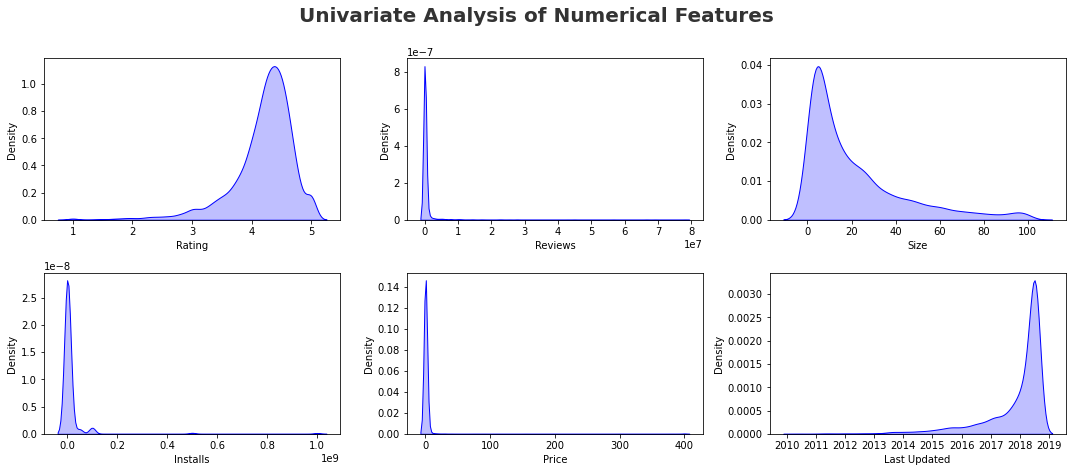

In [20]:
# ploting kde plot for all the numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report

In [21]:
# rating - left skewed 
# size, install,last update -right skewed
# most of the updates is from 2017 to 2019
# it means there are outliers present in these features  .. we can handel it with IQR method

#### Categorical Features

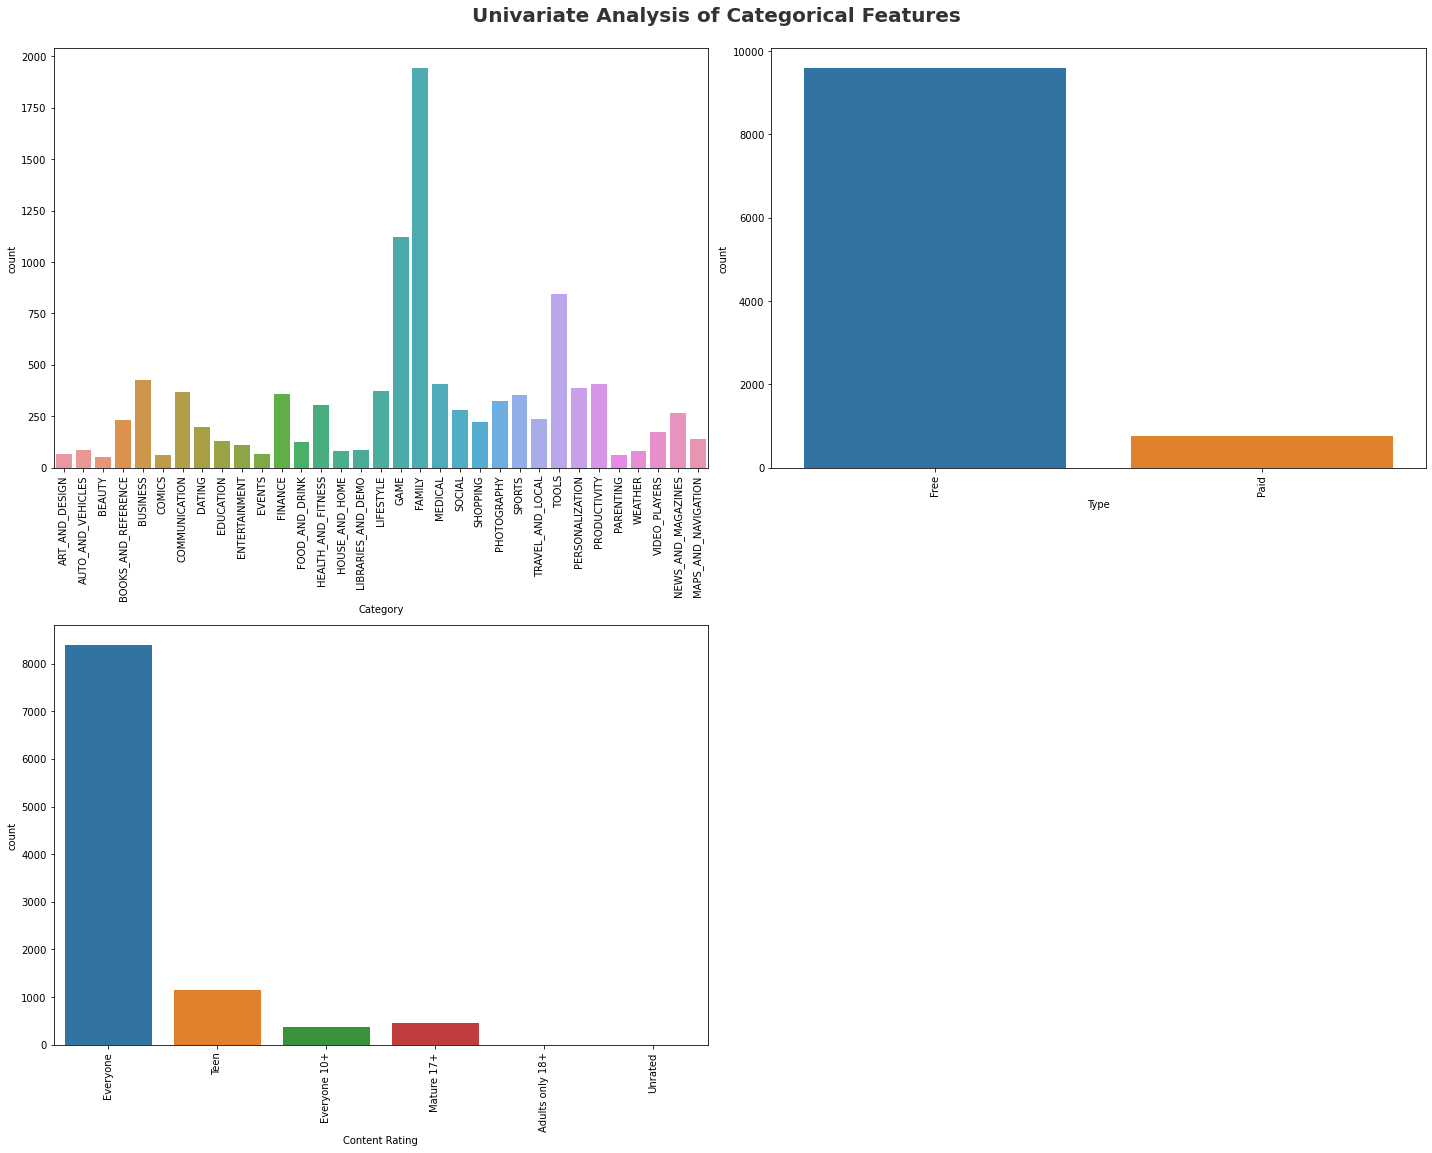

In [22]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Category', 'Type', 'Content Rating']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.tight_layout()
    plt.xticks(rotation = 90);

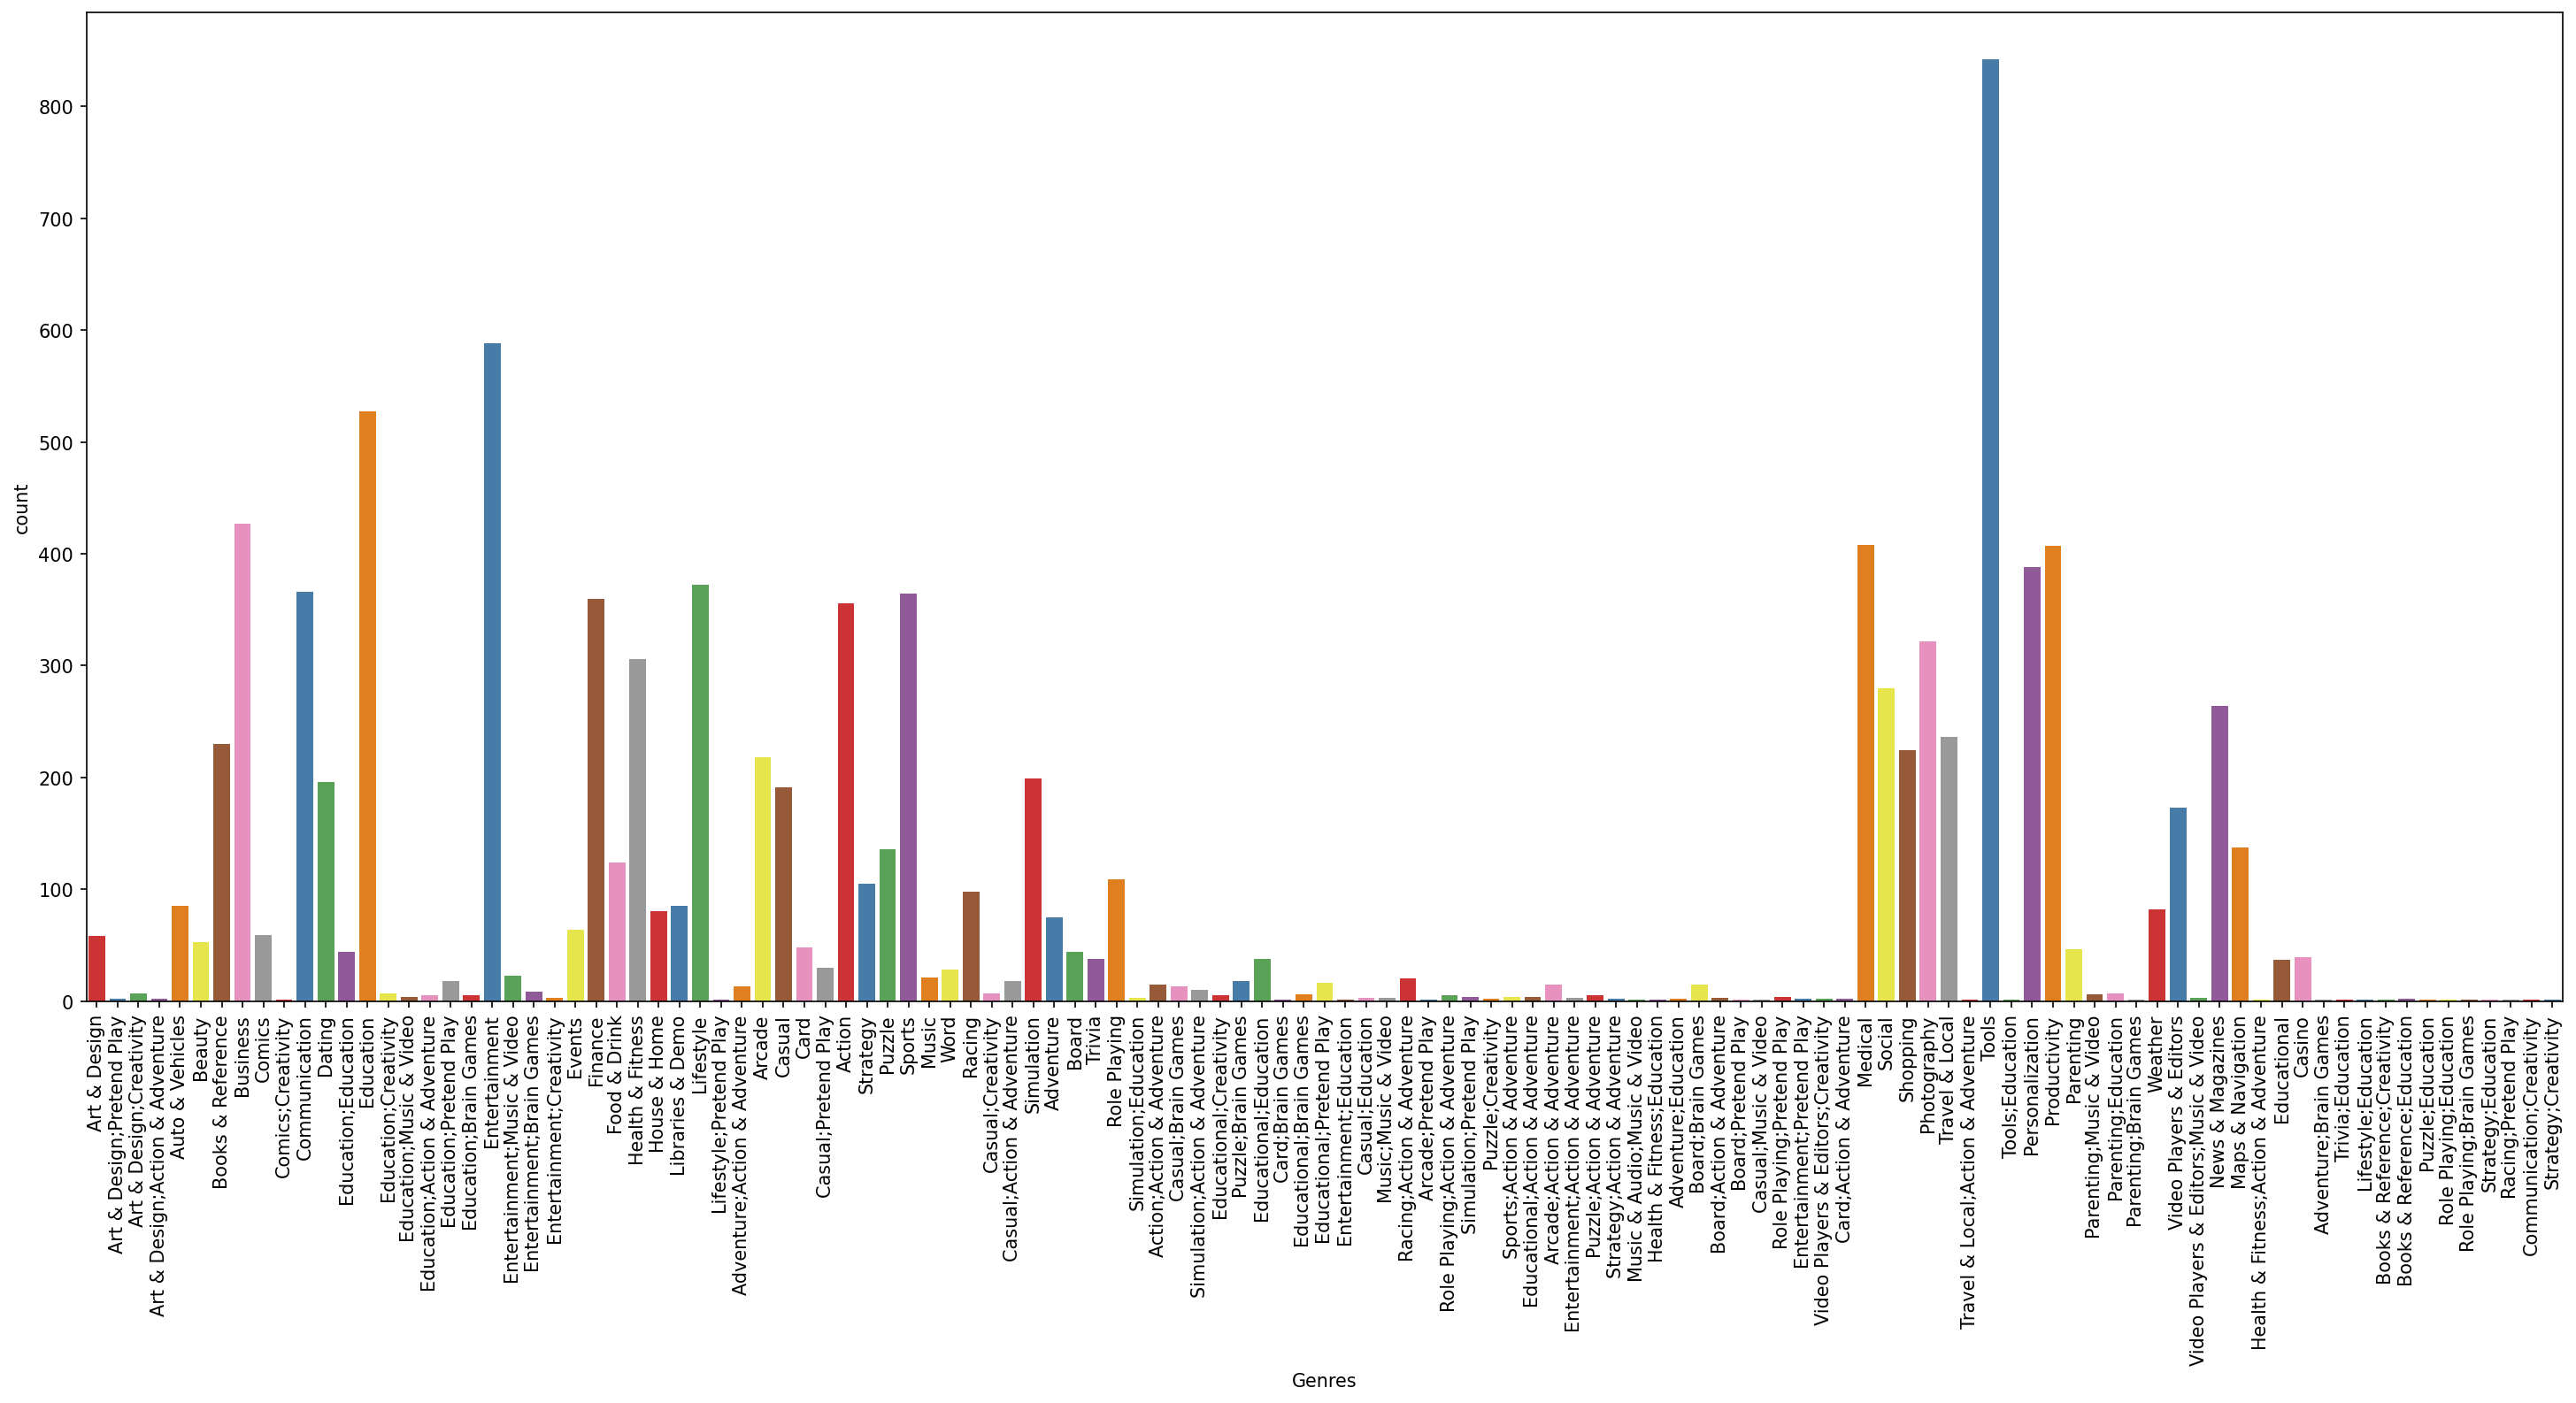

In [23]:
plt.figure(figsize = (20,10), dpi =150)
sns.countplot(x=df["Genres"],palette = "Set1")
plt.xlabel("Genres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(rotation = 90);

#### which one is more frequent category 

In [24]:
df["Category"].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

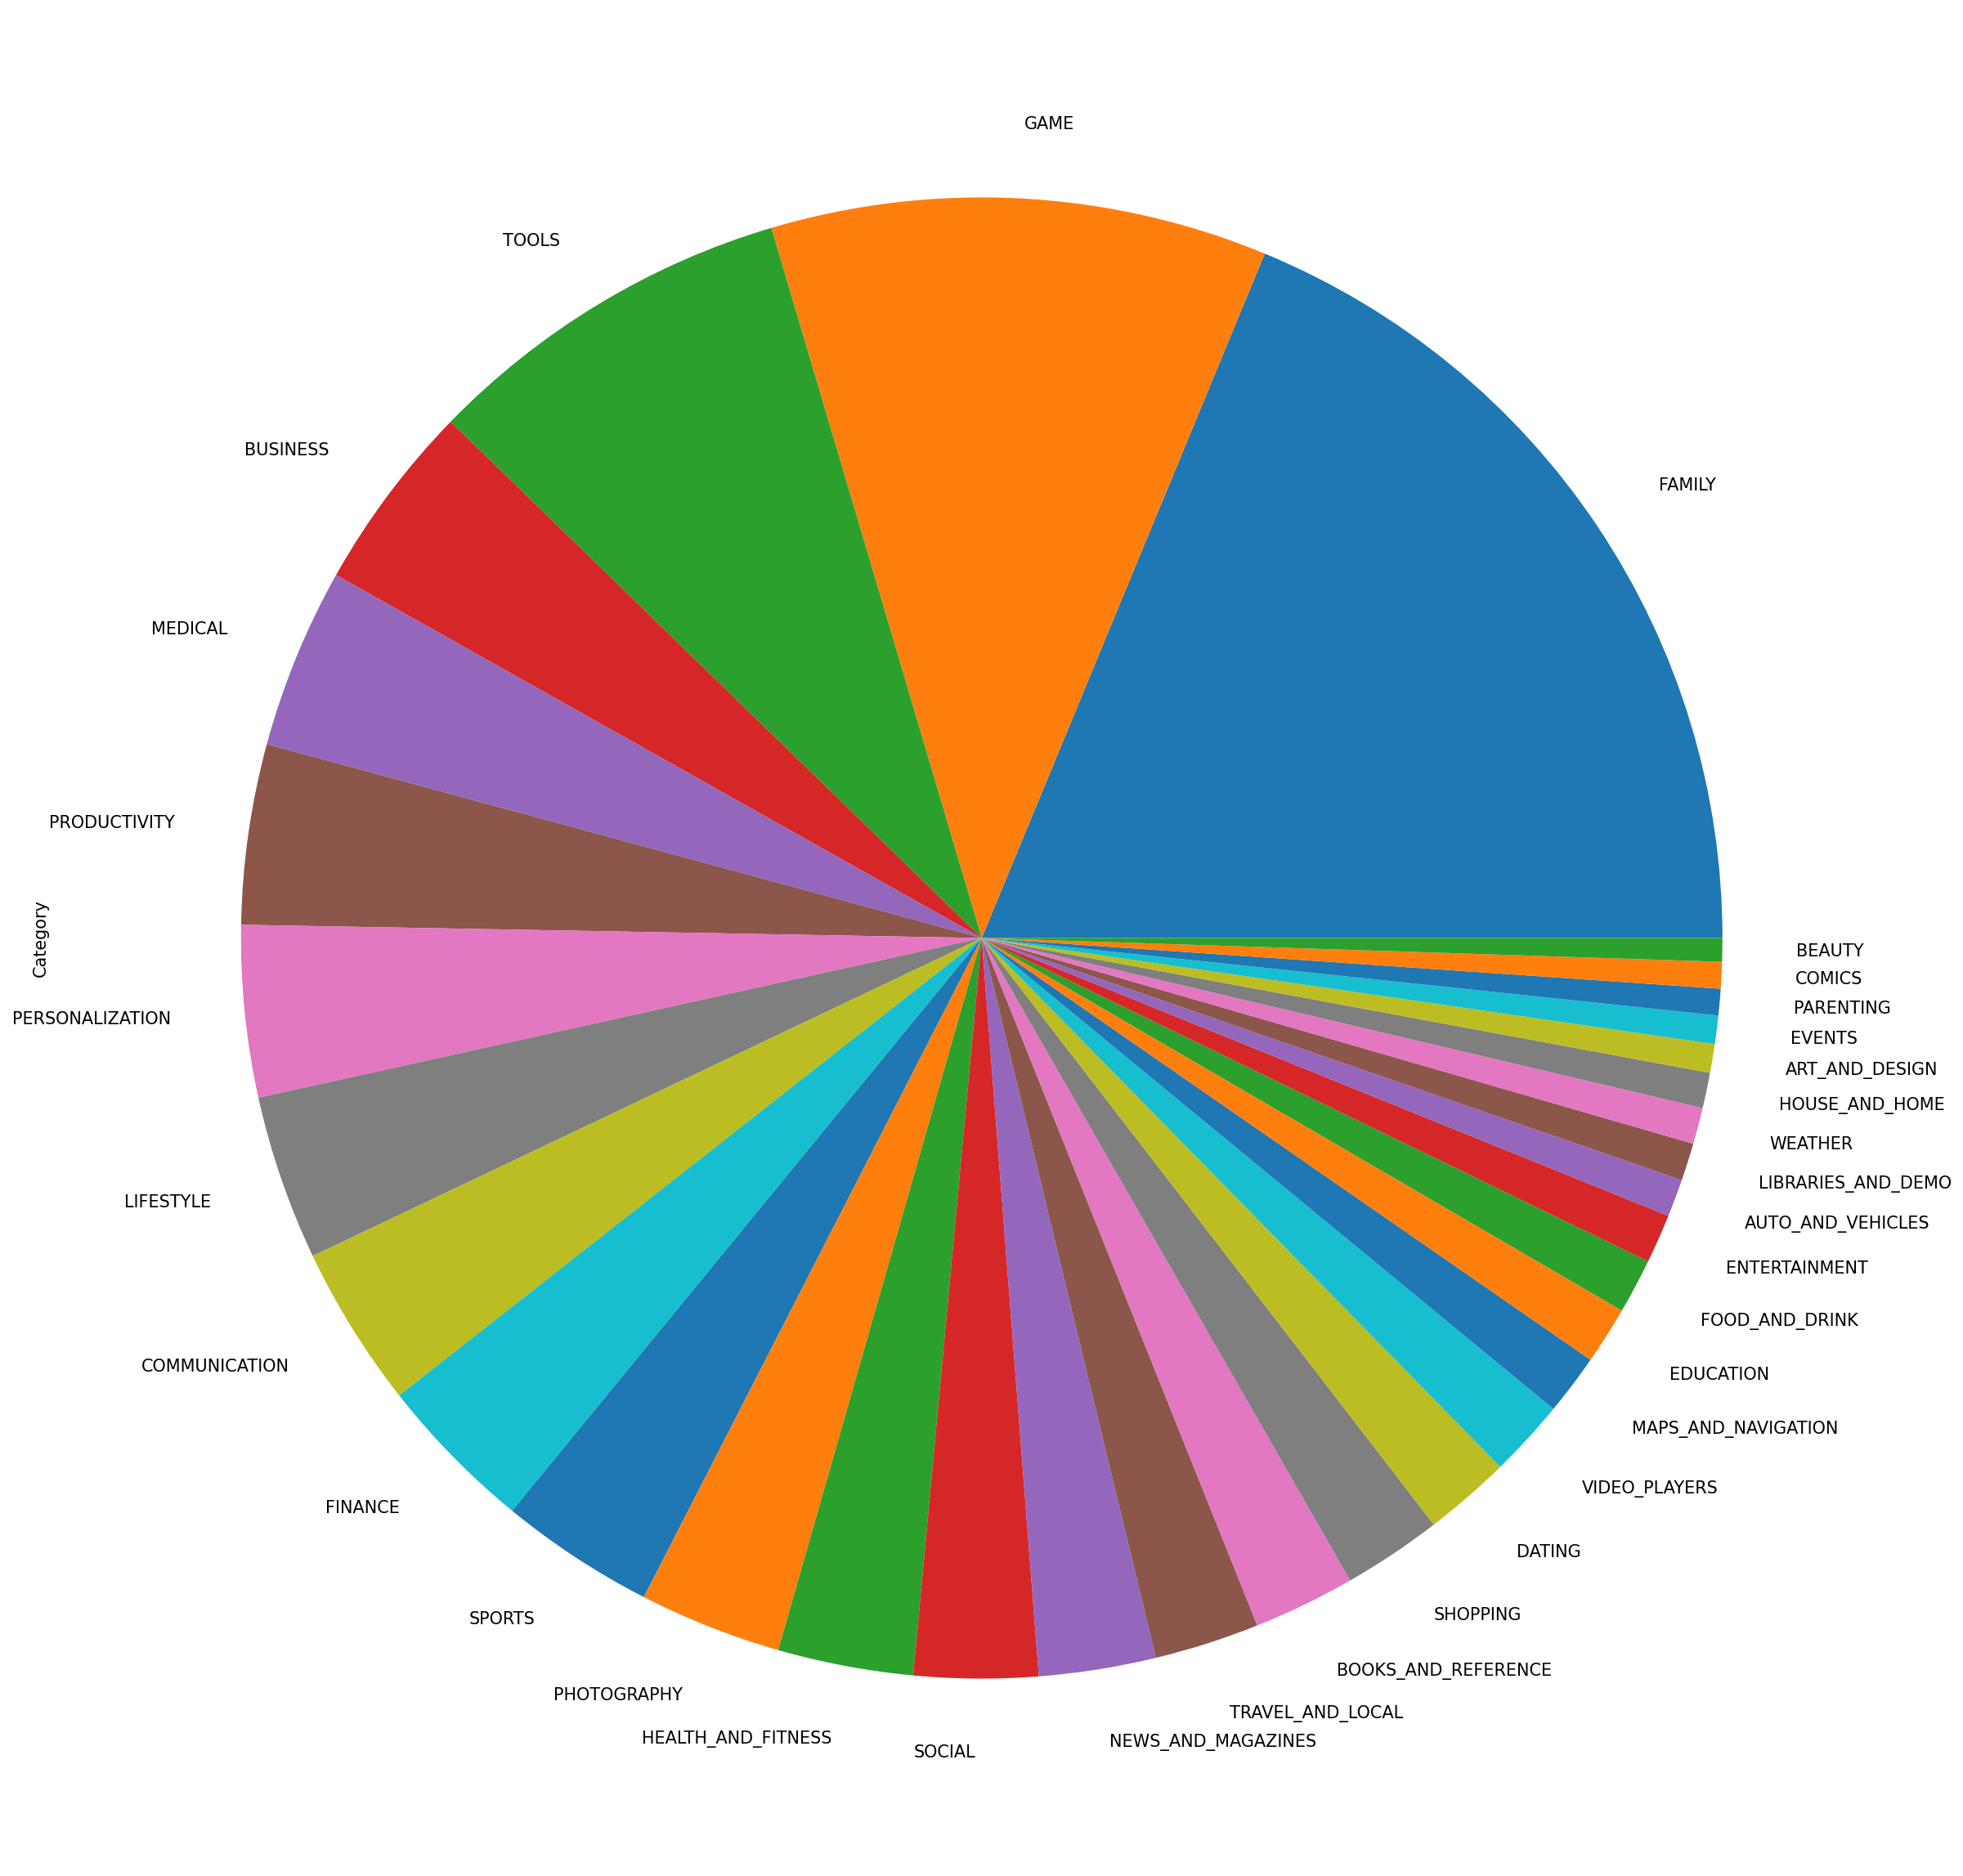

In [25]:
plt.figure(figsize = (20,20), dpi =150)
df["Category"].value_counts().plot(kind="pie")

#### top 10 app category

<AxesSubplot:ylabel='Category'>

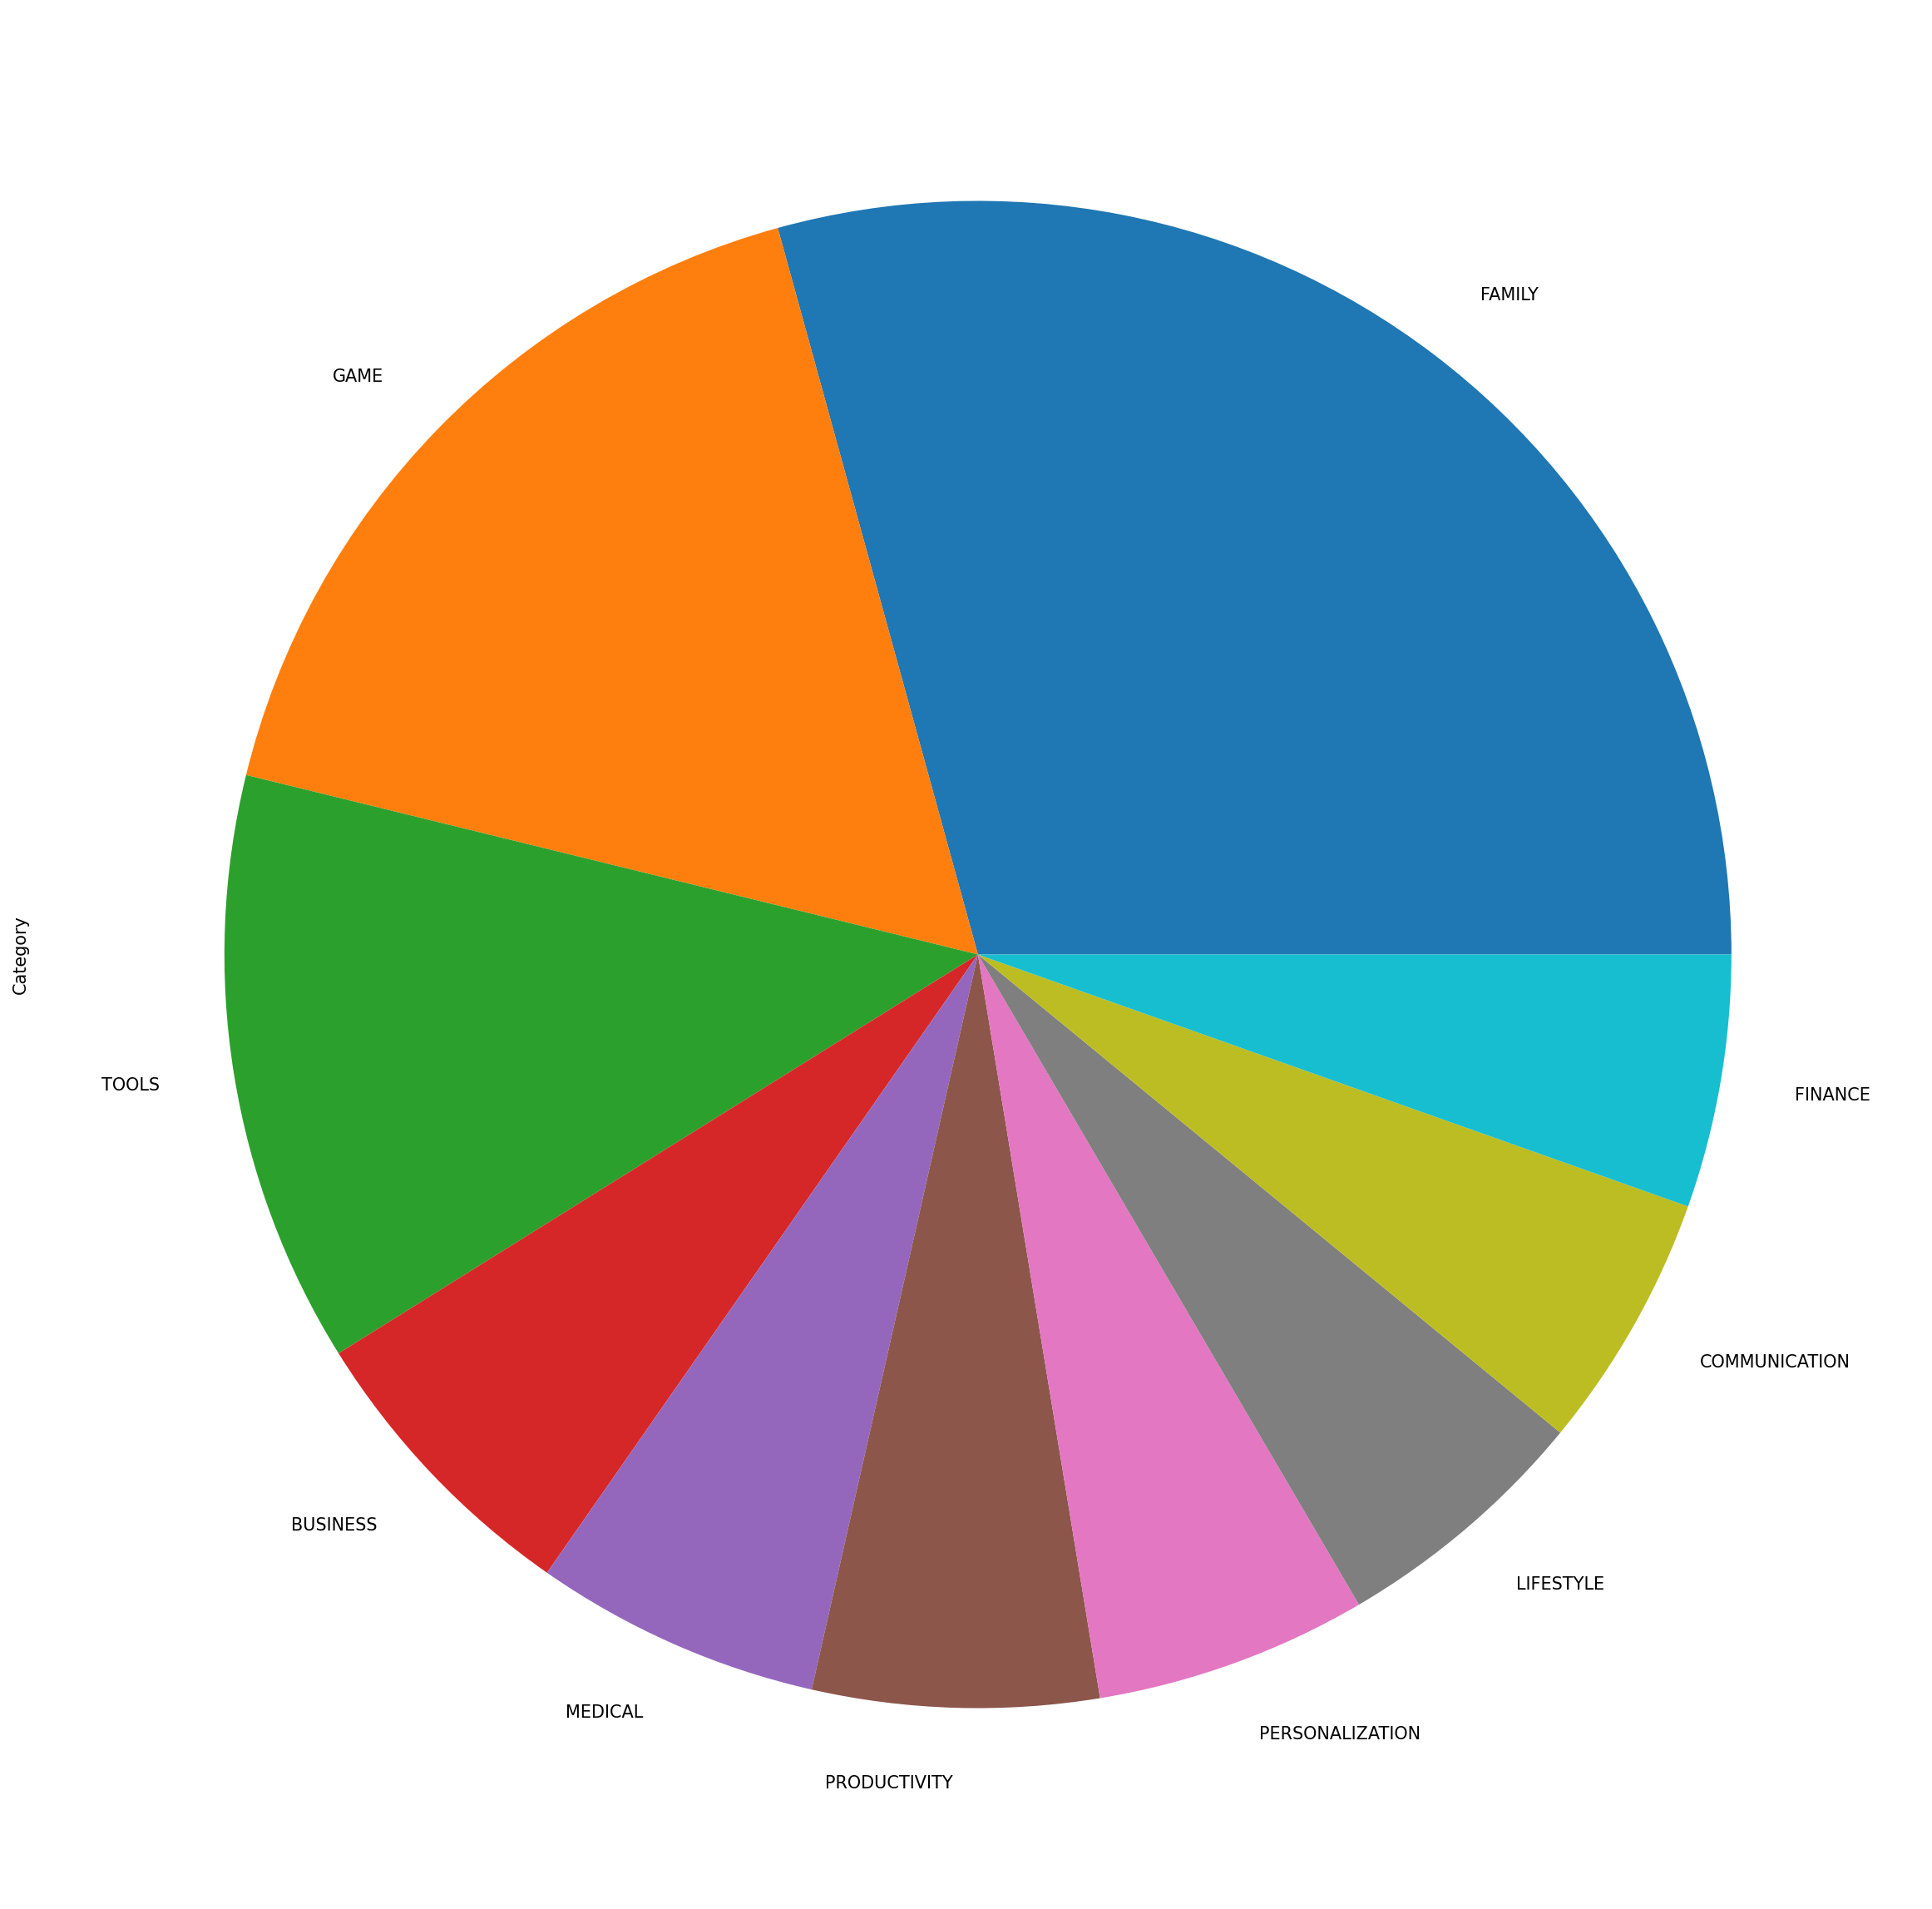

In [26]:
plt.figure(figsize = (20,20), dpi =150)
df["Category"].value_counts().head(10).plot(kind="pie")

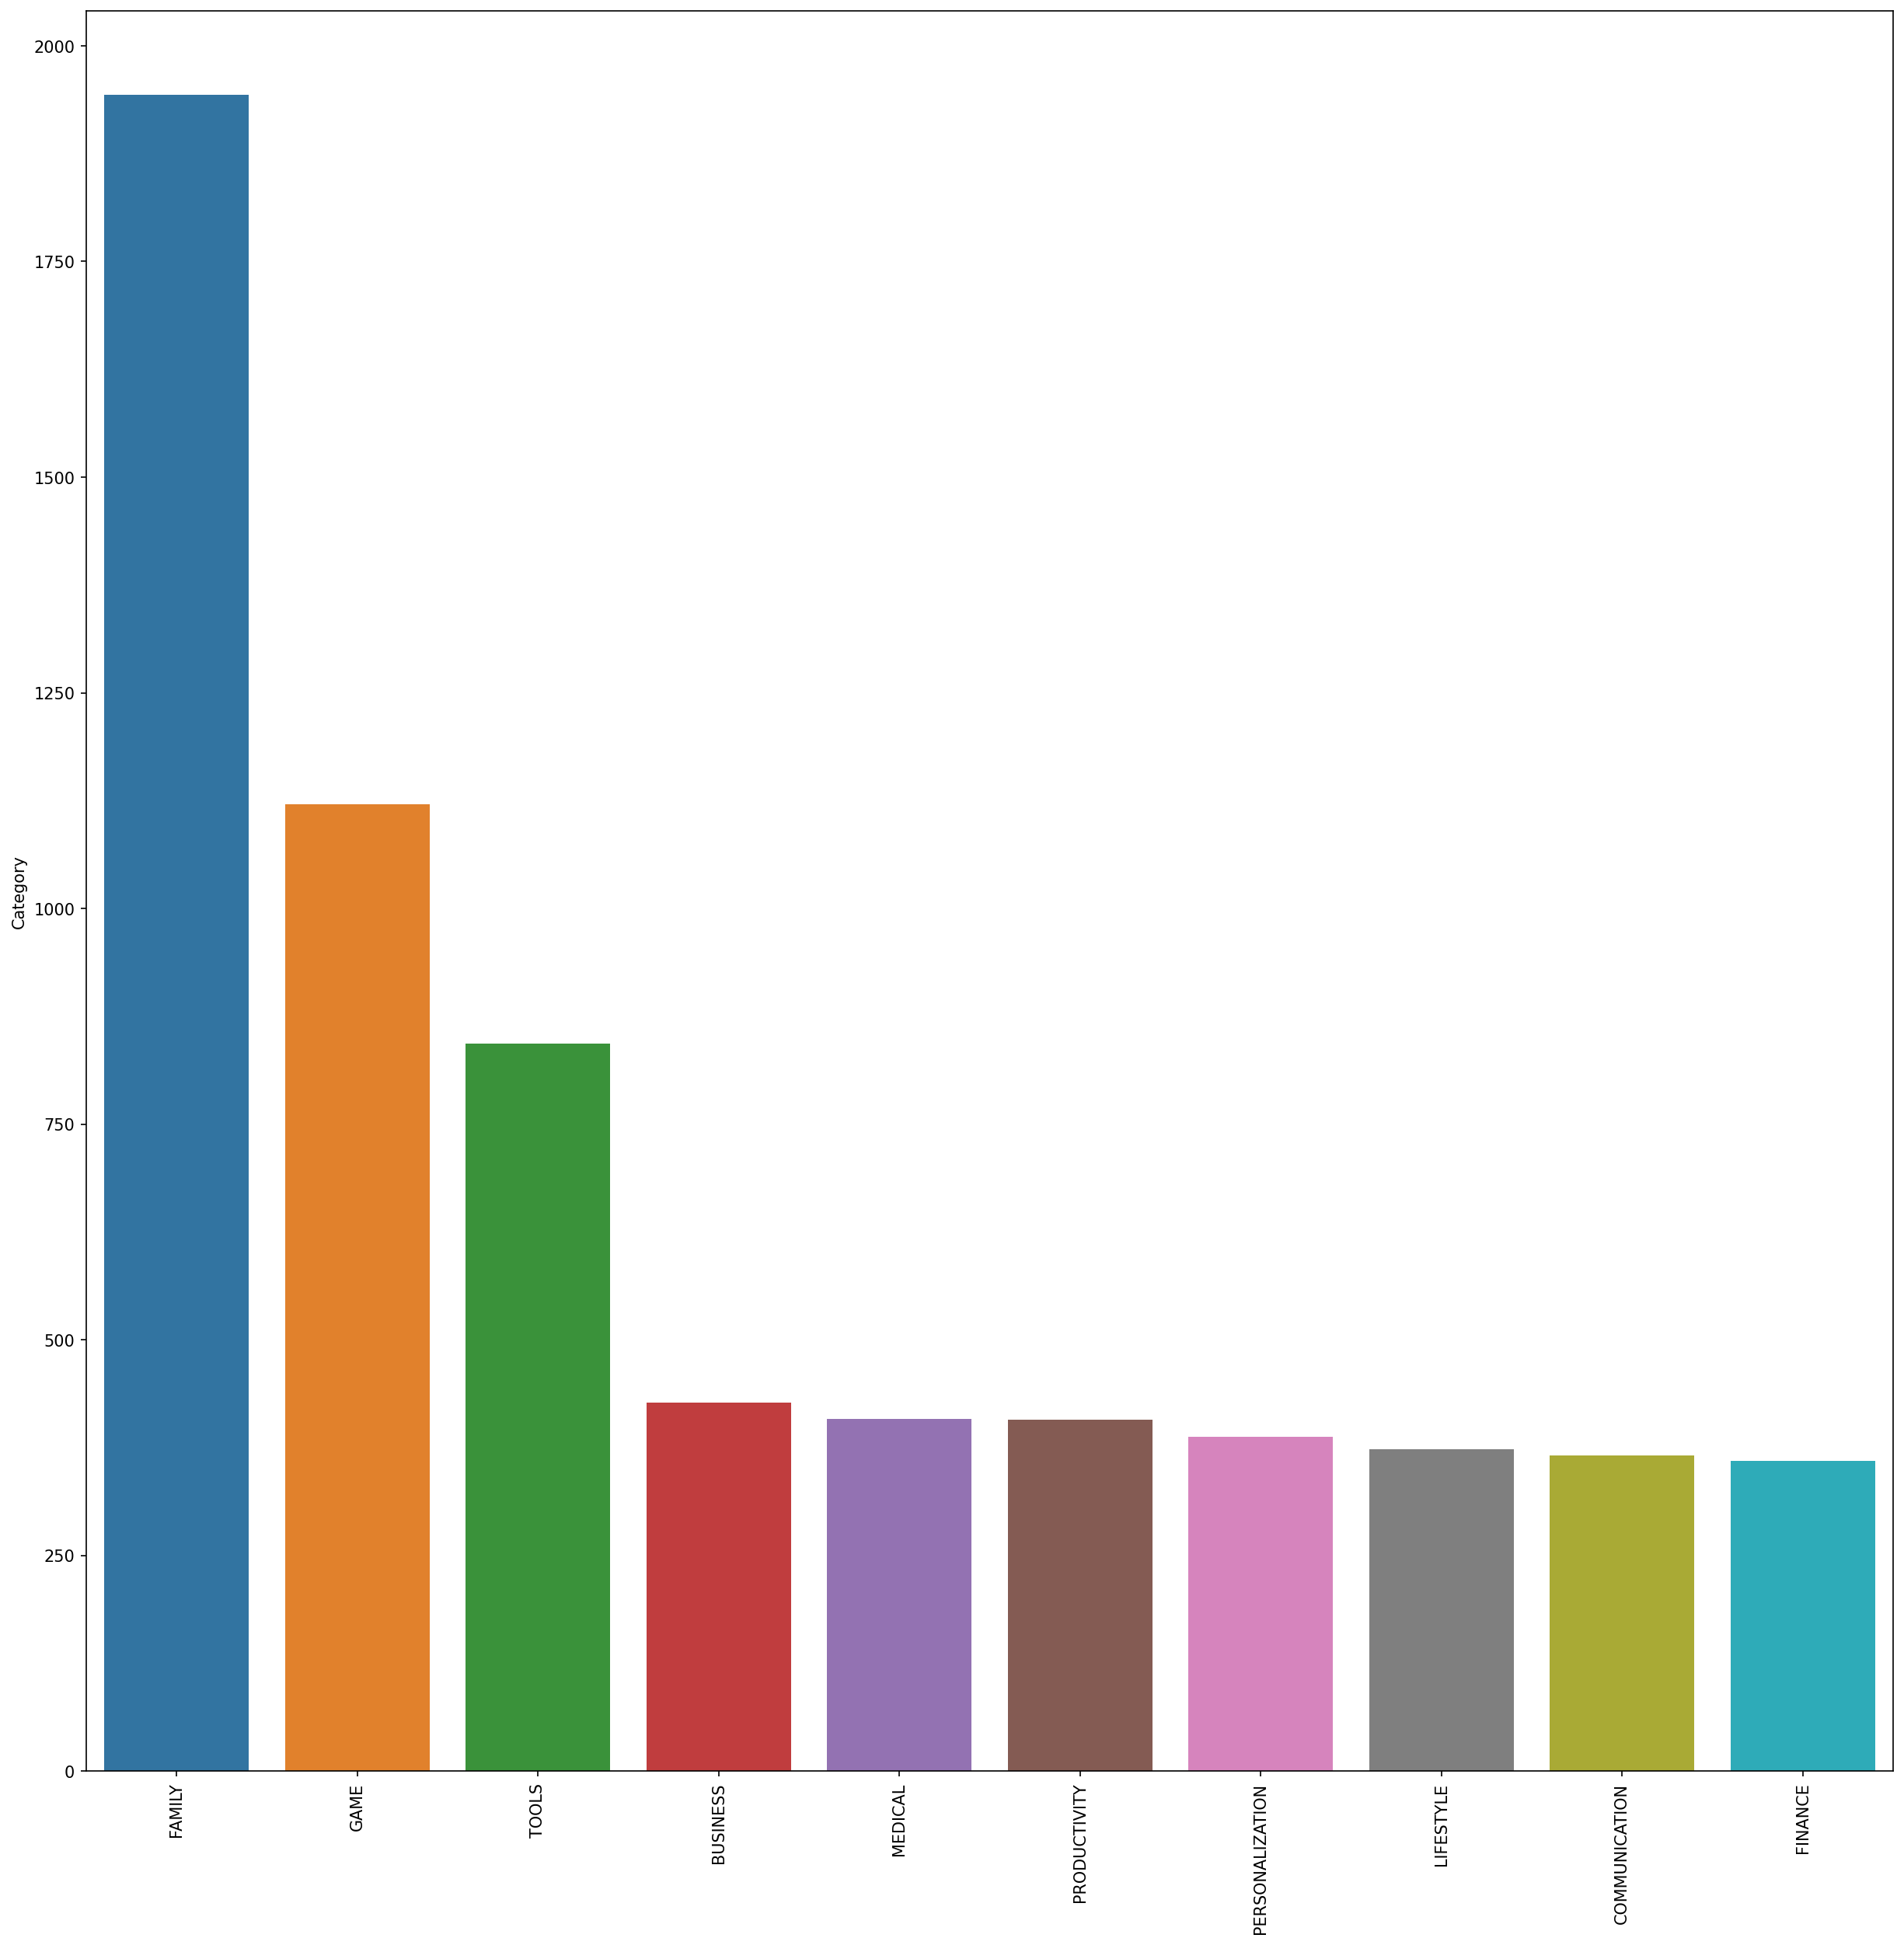

In [27]:
plt.figure(figsize = (20,20), dpi =150)
c=pd.DataFrame(df["Category"].value_counts().head(10))
sns.barplot(x=c.index[:10],y="Category",data=c[:10])
plt.xticks(rotation = 90);

#### free and paid app

<AxesSubplot:ylabel='Type'>

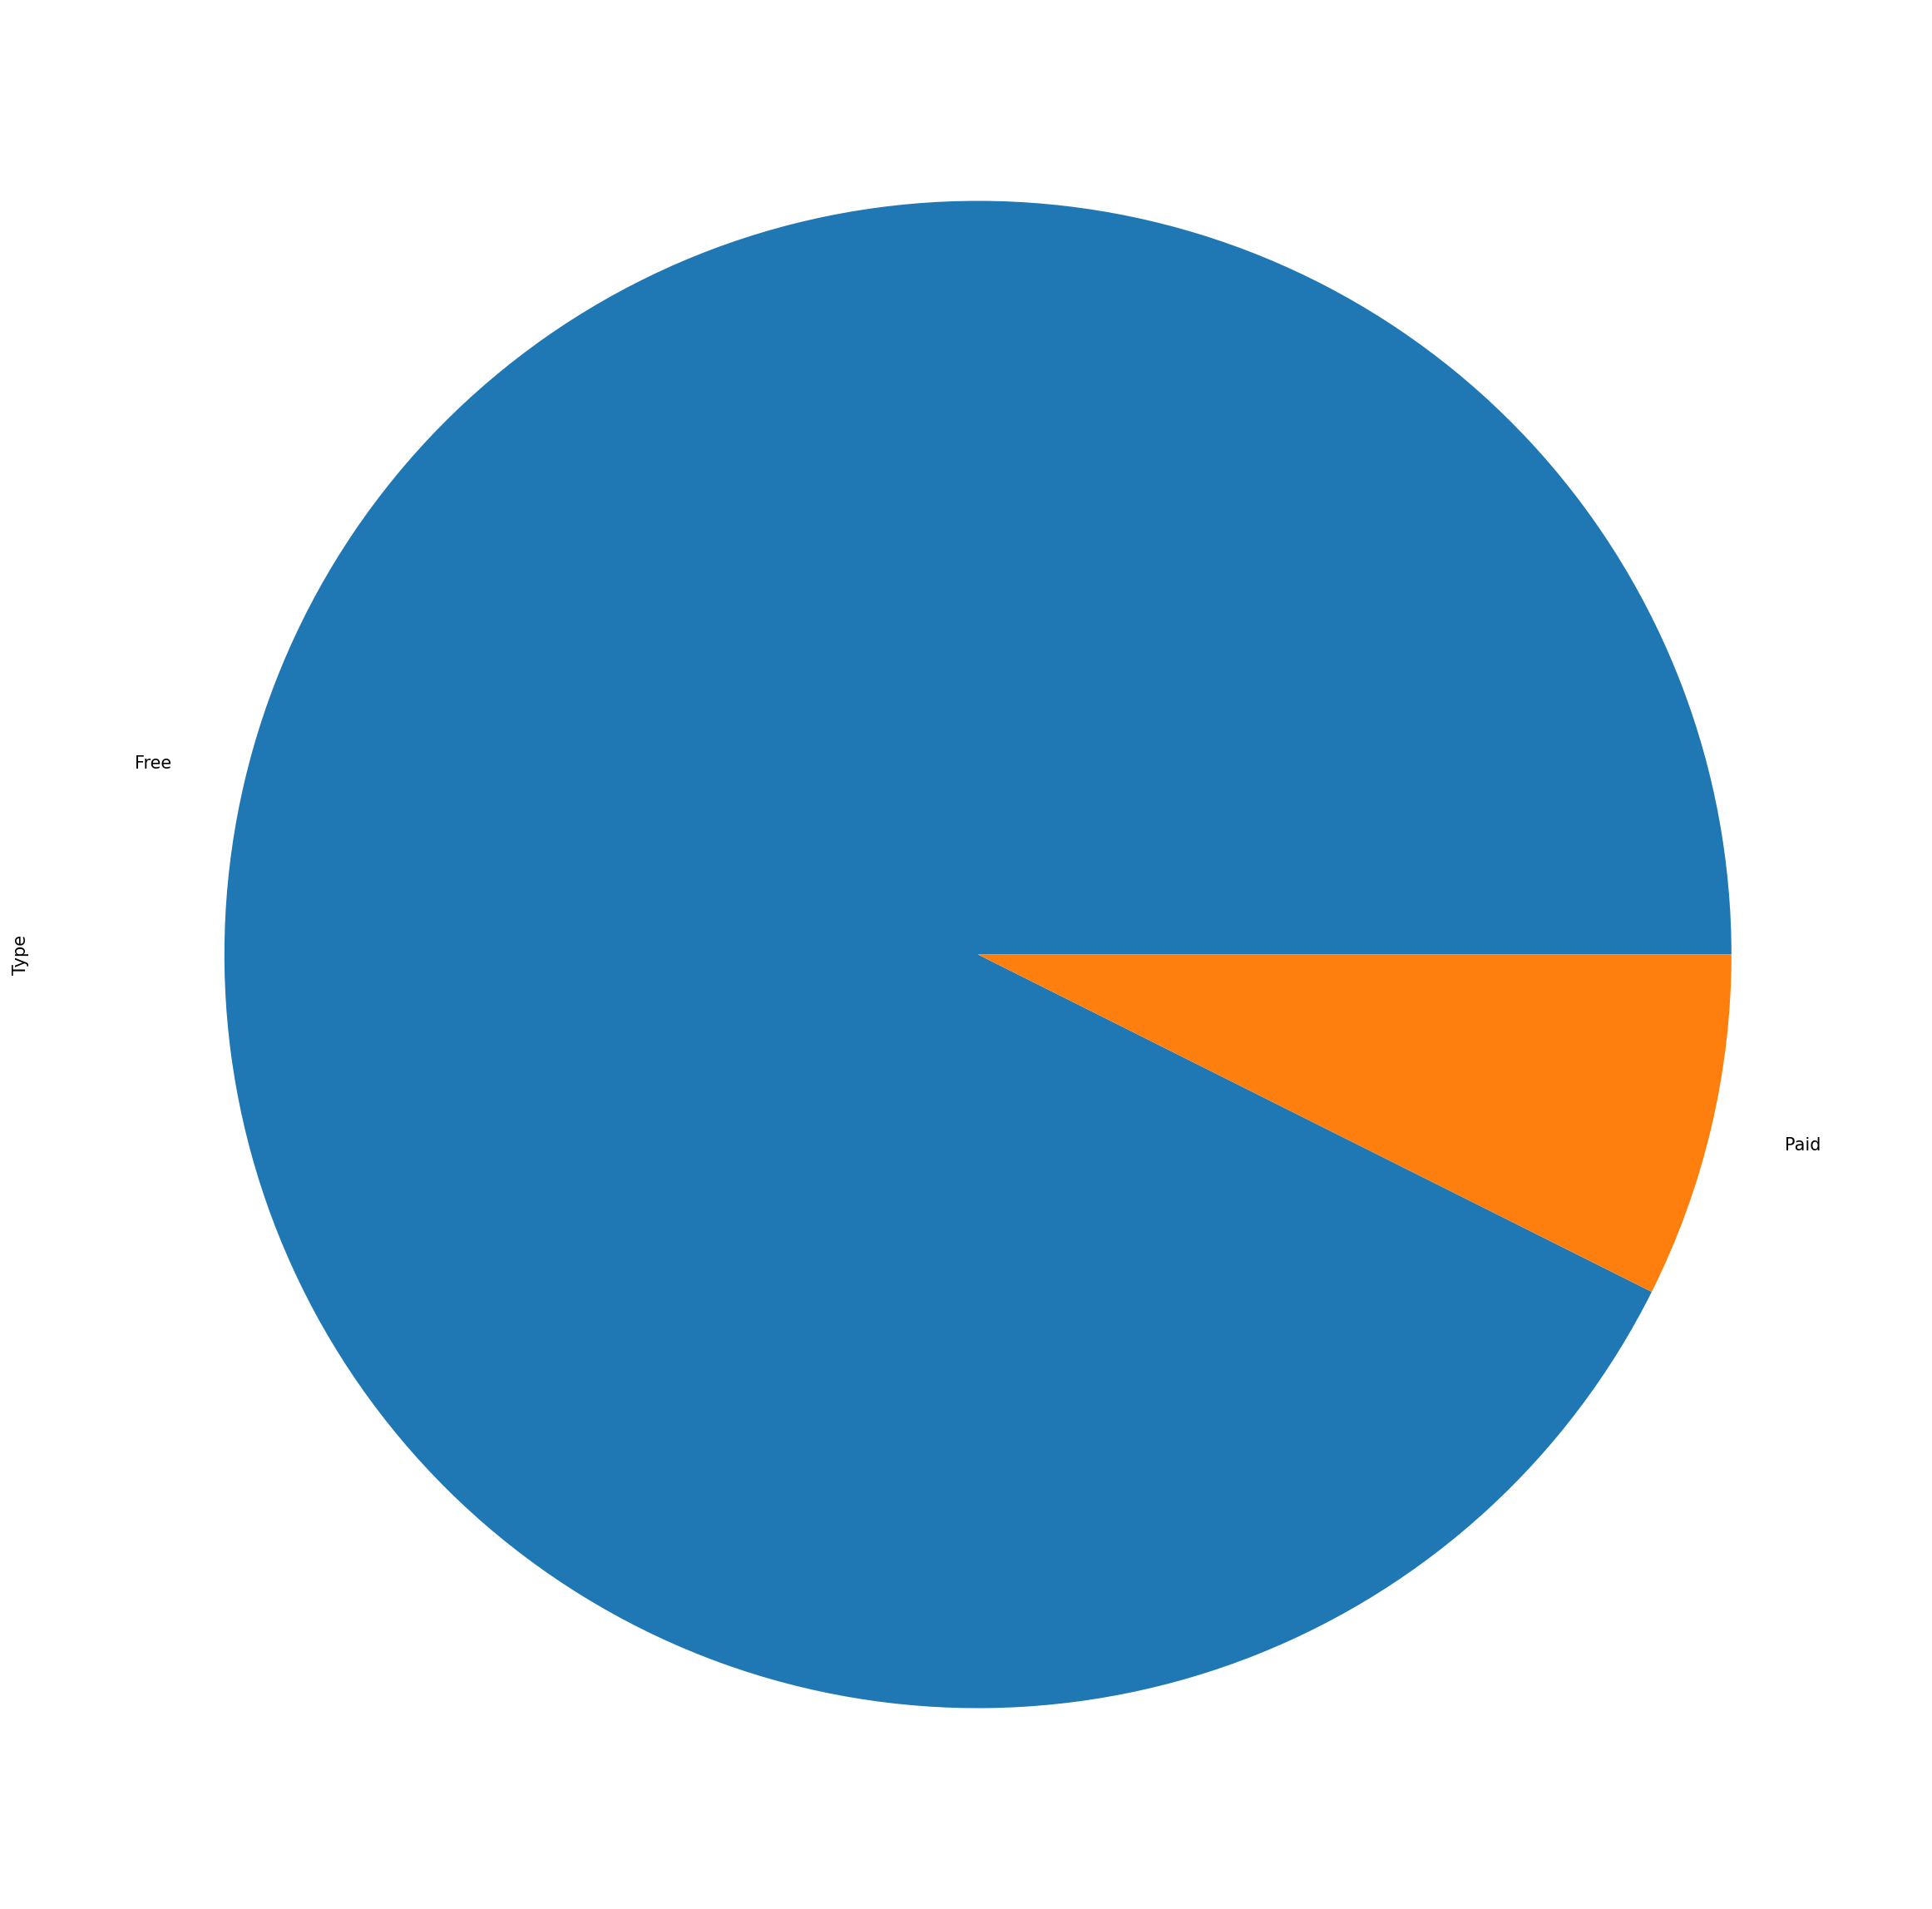

In [28]:
plt.figure(figsize = (20,20), dpi =150)
df["Type"].value_counts().plot(kind="pie")

#### Report

In [29]:
# Type--> most of the apps are free
# category --> most of the apps belong to  game and family category
# content rating --> most of the apps are for every one
# geners --> most of the apps belong to Tools geners

### Multivariate Analysis

Multivariate analysis is the analysis of more than one variable.

##### Check Multicollinearity in Numerical features

In [30]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068732,0.082187,0.050886,-0.022355
Reviews,0.068732,1.000000,0.237880,0.634997,-0.009417
Size,0.082187,0.237880,1.000000,0.168883,-0.023729
Installs,0.050886,0.634997,0.168883,1.000000,-0.011147
Price,-0.022355,-0.009417,-0.023729,-0.011147,1.000000


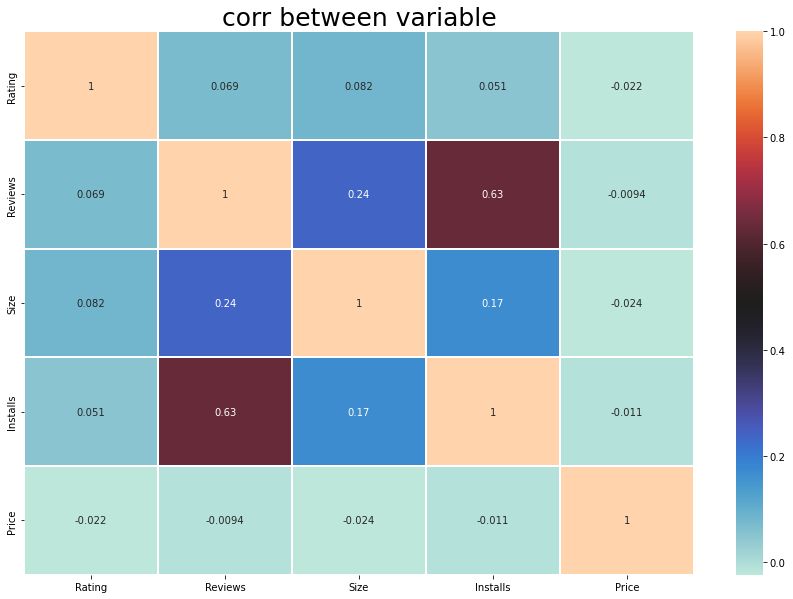

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color='black',size=25)
plt.show()

#### report

In [32]:
# Reviews is highly correlated to Installs

### Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e Selling Price

In [33]:
# right now we don't know about the target featute
# for the time being we are taking Rating as target

In [34]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Rating'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,App,Reject Null Hypothesis
1,Category,Reject Null Hypothesis
2,Type,Reject Null Hypothesis
3,Content Rating,Fail to Reject Null Hypothesis
4,Genres,Fail to Reject Null Hypothesis
5,Current Ver,Reject Null Hypothesis
6,Android Ver,Reject Null Hypothesis


### Checking Null Values

In [35]:
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [36]:
df.isna().mean()*100

App                0.000000
Category           0.000000
Rating            14.145023
Reviews            0.000000
Size              14.733996
Installs           0.000000
Type               0.009655
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.077242
Android Ver        0.019311
dtype: float64

In [37]:
#Rating , Size , Type , Current Ver have null records so we have to deal with it later.

### continious feature 

In [38]:

continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']


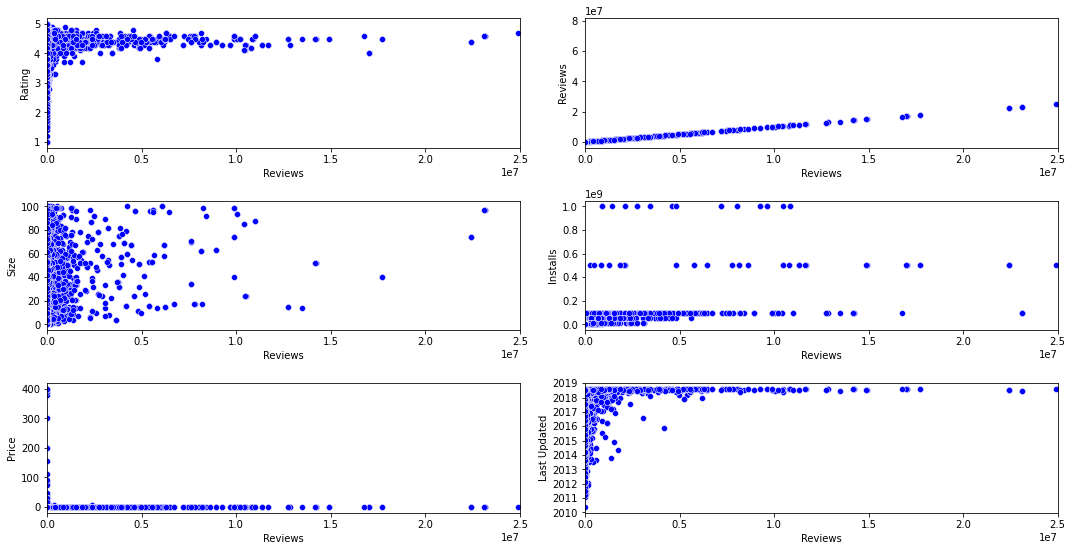

In [39]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='Reviews', y=continues_features[i], color='b')
    plt.xlim(0,25000000) 
    plt.tight_layout()

#### Report


- more number of reviews then lesser the price

### which category have largest number of installantion


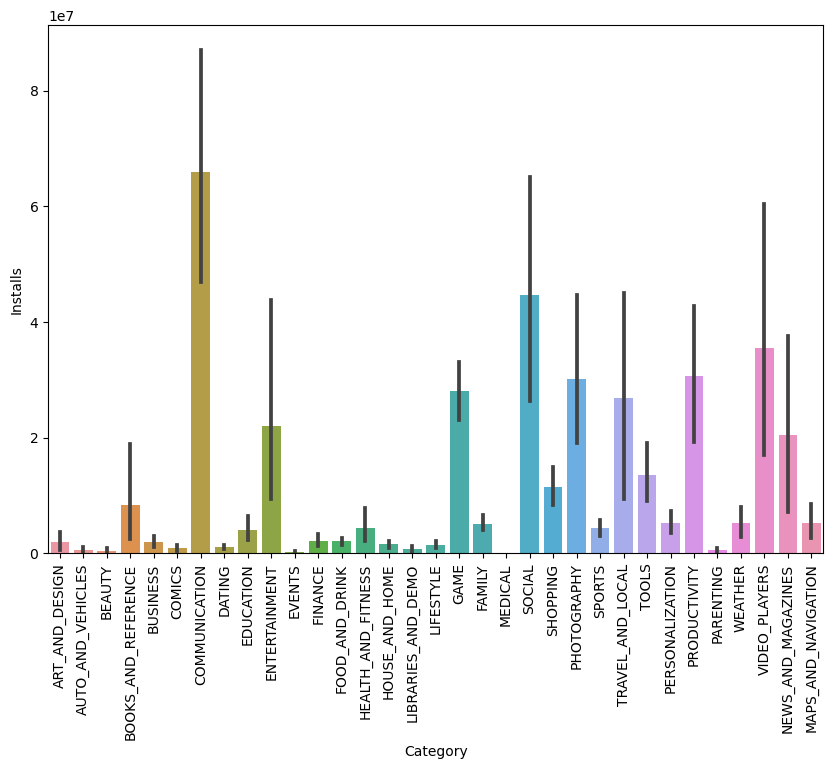

In [40]:
plt.figure(figsize = (10,7), dpi =100)
sns.barplot(x="Category",y="Installs",data=df)
plt.xticks(rotation = 90);

Text(0, 0.5, 'Category')

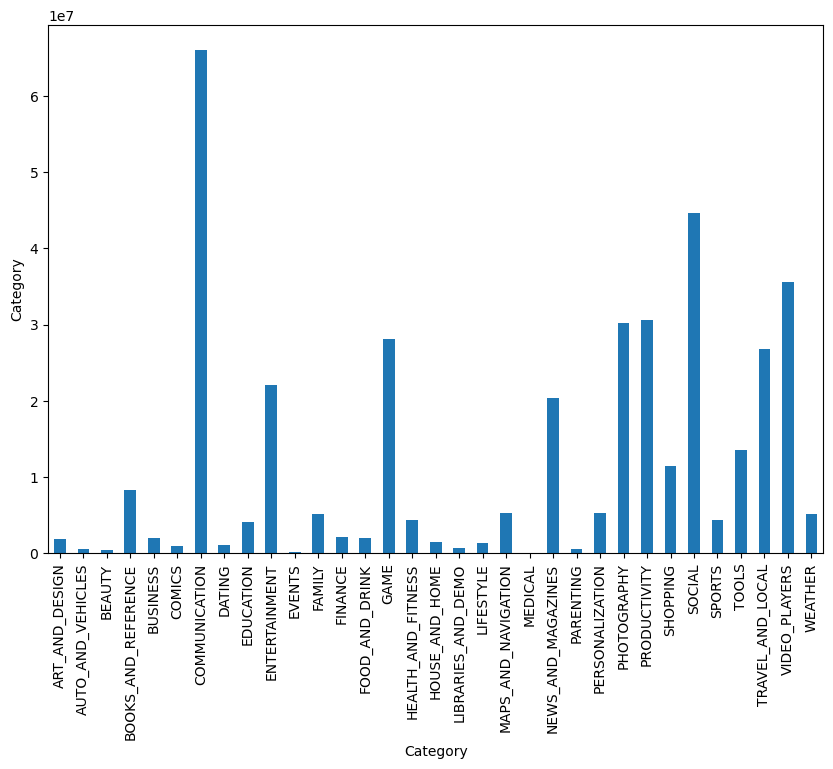

In [41]:
#or
plt.figure(figsize = (10,7), dpi =100)
df.groupby(df["Category"])["Installs"].mean().plot(kind="bar")
plt.ylabel("Installs")
plt.ylabel("Category")

### how many apps  are there  on google plays store having 5 star rating

In [42]:
df[df["Rating"]==5]["App"].value_counts().sum()

271

### does size of the application has any impact on its popularity

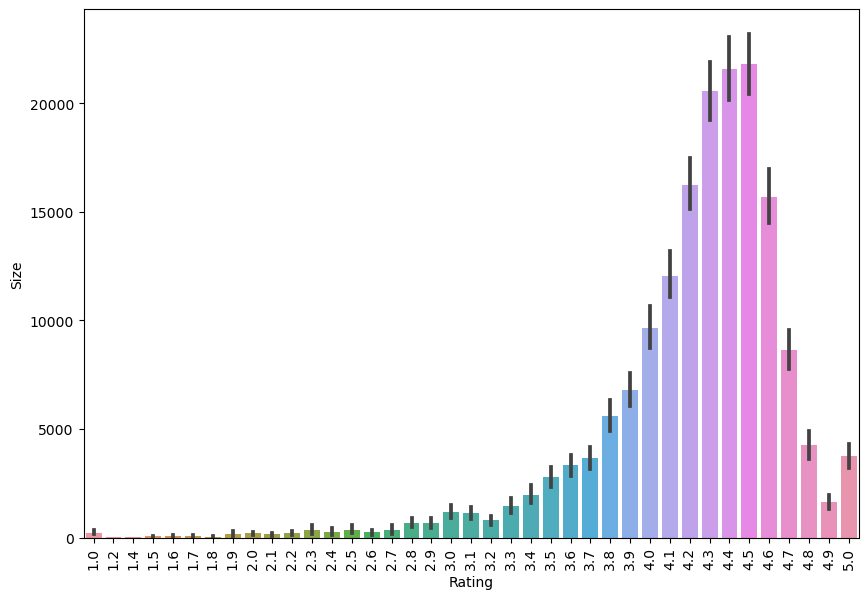

In [43]:
plt.figure(figsize = (10,7), dpi =100)
sns.barplot(x="Rating",y="Size",data=df,estimator=sum)
plt.xticks(rotation = 90);

Text(0, 0.5, 'size')

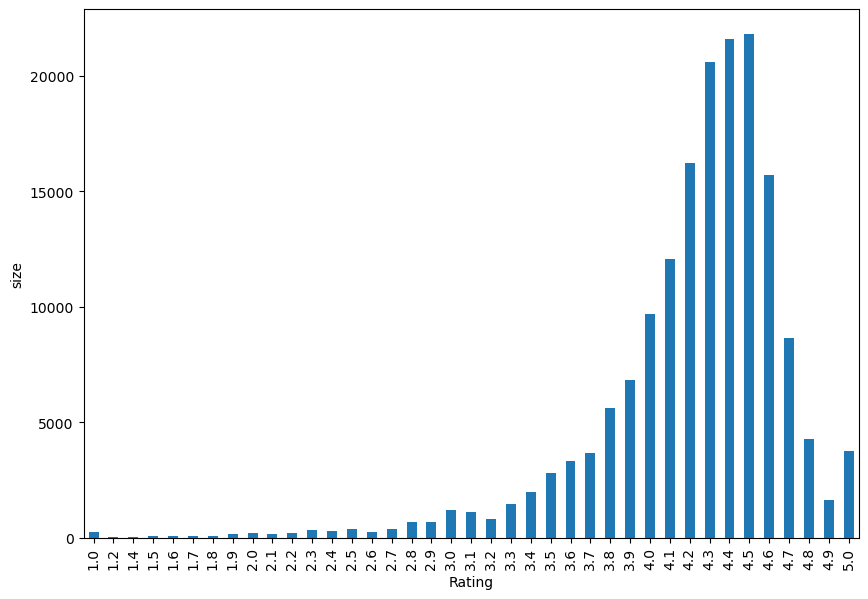

In [44]:
#or
plt.figure(figsize = (10,7), dpi =100)
df.groupby(df["Rating"])["Size"].sum().plot(kind="bar")
plt.ylabel("Rating")
plt.ylabel("size")

<AxesSubplot:xlabel='Rating', ylabel='Size'>

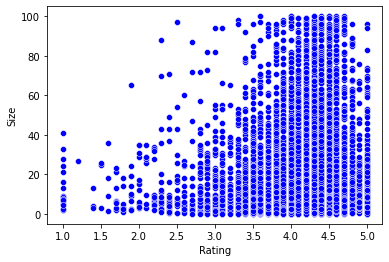

In [45]:
sns.scatterplot(data= df ,x='Rating', y="Size", color='b')

In [46]:
# size is showing exponential increase w.r.t to raing 

### what are the 5  most apps in each popular category

In [47]:
(df[df["Category"]=='ART_AND_DESIGN']["Rating"].nlargest(5).index)

Int64Index([8888, 25, 3982, 4759, 5254], dtype='int64')

In [48]:
from IPython.display import display
print("5 most apps in each popular category")
all_category=df["Category"].unique()
for i in all_category:
    z= pd.DataFrame(df.loc[(df[df["Category"]==i]["Rating"].nlargest(5).index)]["App"])
    print("\n")
    print("Category--->" ,i)
    display(z)

5 most apps in each popular category


Category---> ART_AND_DESIGN


,App
8888,Spring flowers theme couleurs d t space
25,Harley Quinn wallpapers HD
3982,Cardi B Wallpaper
4759,X Launcher Pro - IOS Style Theme & Control Center
5254,AJ Styles HD Wallpapers




Category---> AUTO_AND_VEHICLES


,App
55,Tickets SDA 2018 and Exam from the State Traff...
61,CDL Practice Test 2018 Edition
64,DMV Permit Practice Test 2018 Edition
79,Tickets + PDA 2018 Exam
4120,MHD F-Series




Category---> BEAUTY


,App
99,"ipsy: Makeup, Beauty, and Tips"
108,Prom MakeUp Tutorial
98,Hush - Beauty for Everyone
100,Natural recipes for your beauty
106,Tie - Always be happy




Category---> BOOKS_AND_REFERENCE


,App
4539,R Programing Offline Tutorial
5237,Hey AJ! It's Saturday!
5763,Tozer Devotional -Series 1
5966,BC MVA Fines
6840,Catholic La Bu Zo Kam




Category---> BUSINESS


,App
5125,Ag Valley Cooperative
5685,Jobs in Canada - Emplois au Canada
6272,Propel BI APP
6342,BJ Foods
6391,BK Arogyam Task Track




Category---> COMICS


,App
329,Hojiboy Tojiboyev Life Hacks
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News"
301,Unicorn Pokez - Color By Number
6407,WebComics
299,GANMA! - All original stories free of charge f...




Category---> COMMUNICATION


,App
6727,BS-Mobile
6852,BV
7142,Cb browser
9119,chat dz
9455,EJ messenger




Category---> DATING


,App
612,American Girls Mobile Numbers
615,Awake Dating
633,Spine- The dating app
636,Girls Live Talk - Free Text and Video Chat
640,Online Girls Chat Group




Category---> EDUCATION


,App
712,"Learn Japanese, Korean, Chinese Offline & Free"
851,Sago Mini Hat Maker
707,English Grammar Test
848,SoloLearn: Learn to Code for Free
699,Duolingo: Learn Languages Free




Category---> ENTERTAINMENT


,App
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
863,Motorola Spotlight Player™
889,Twitch: Livestream Multiplayer Games & Esports
899,Fandango Movies - Times + Tickets
989,Kidjo TV Kids Have Fun & Learn




Category---> EVENTS


,App
1028,SUMMER SONIC app
1030,Prosperity
1038,Mindvalley U Tallinn 2018
9282,EF Events
9498,EK Bailey Preaching Conference




Category---> FINANCE


,App
6275,BI APP
6398,BK Gold App
6953,BxPort - Bitcoin Bx (Thailand)
7258,CF
7896,CT Checkout




Category---> FOOD_AND_DRINK


,App
5776,Food-Aw - Order Food Online in Aruba
6646,Bar-B-Q Rib House
1212,SarashpazPapion (Cooking with Chef Bowls)
6650,Bar-B-Q Recipes
1181,Easy Recipes




Category---> HEALTH_AND_FITNESS


,App
6484,BM Physiotherapy Clinic
6605,MI-BP
6863,Bacterial vaginosis Treatment - Sexual disease
7122,CB Fit
7131,C B Patel Health Club




Category---> HOUSE_AND_HOME


,App
1447,"Viva Decora - Decoration, Photos, Architecture..."
1471,DIY On A Budget
1486,Ruler
1456,Houzz Interior Design Ideas
1463,Living Smart Home




Category---> LIBRARIES_AND_DEMO


,App
1547,Eternal life
7405,Nur təfsiri 1-ci cild
1524,Call Recorder
1550,Blackpink as if it's your last
1555,Girls Nancy Ajram Without Net




Category---> LIFESTYLE


,App
5064,Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka
5108,Lakeside AG Moultrie
5251,AJ Men's Grooming
6045,Helping BD
6238,Barbers.BH




Category---> GAME


,App
5795,Axe Champs! Wars
5822,Flippy Axe : Flip The Knife & Axe Simulator
5917,Ra Ga Ba
6700,Brick Breaker BR
7402,Trovami se ci riesci




Category---> FAMILY


,App
5246,Hey AJ! It's Bedtime!
5268,AJ Rafael Music Lessons
5450,AP® Guide
5482,meStudying: AP English Lit
5489,AP Art History Flashcards




Category---> MEDICAL


,App
2262,Super Hearing Secret Voices Recorder PRO
2271,FHR 5-Tier 2.0
2427,Sway Medical
2445,Labs on Demand
2448,Dermatology Atlas (Colored & Illustrative)




Category---> SOCIAL


,App
5118,Eternal Light AG
6030,iCard BD Plus
6055,Movement BE
7147,CB Heroes
7418,CJ Gospel Hour




Category---> SHOPPING


,App
5245,AJ RETAILS
5828,A-Y Collection
6422,BL Flowers Digital
7895,Dine In CT - Food Delivery
8391,DG OFF - 100% Free Coupons & Deals




Category---> PHOTOGRAPHY


,App
5230,AJ Cam
5238,Selfie With Champion AJ Style
7127,CB VIDEO VISION
7291,CG Prints
8281,DC-014




Category---> SPORTS


,App
7754,CricQuick
9247,EC SPORTS
10166,FA Player Essentials
10563,FK Dedinje BGD
10254,FC Porto




Category---> TRAVEL_AND_LOCAL


,App
6171,BG Guide
7435,CJ's Coffee Cafe
10620,Florida Beach Wallpapers HD
3141,"Yoriza Pension - travel, lodging, pension, cam..."
3155,TravelPirates




Category---> TOOLS


,App
3957,ADS-B Driver
4988,Easy Hotspot Ad Free
6146,ReactNative BG Geolocation
6372,BK Formula Calculator
6494,BM speed test




Category---> PERSONALIZATION


,App
4452,P-Home for KLWP
4477,Android P Style Icon Pack
5260,AJ Gray Dark Icon Pack
5263,AJ Blue Icon Pack
7377,CI 174 Gray Icon Pack




Category---> PRODUCTIVITY


,App
6851,BV Mobile Apps
7422,CJ'S TIRE AND AUTO INC.
7756,iReadMe
8526,DL Image Manager
9188,EB Scanner




Category---> PARENTING


,App
8335,DF Glue Board
3602,White Noise for Baby
3600,How do I take care of my child?
3604,The first year of a baby's life
3614,Rainbow - Journal & Activities




Category---> WEATHER


,App
3627,Weather forecast
3629,Live Weather Pro
3658,Weather Live Pro
3631,weather - weather forecast
7491,Fu*** Weather (Funny Weather)




Category---> VIDEO_PLAYERS


,App
5308,AK Lodi Films
3671,Video Player All Format
4038,"DU Recorder – Screen Recorder, Video Editor, Live"
4946,Flud (Ad free)
5244,AJ Player




Category---> NEWS_AND_MAGAZINES


,App
5196,AI Today : Artificial Intelligence News & AI 101
6266,BI News
7367,"Startupticker.ch News, Events"
8101,NOMISMA.com.cy by FMW
8395,DG TV




Category---> MAPS_AND_NAVIGATION


,App
6023,Tour BD (Bahir Dar Map)
6441,BL Taxi
3848,GPS Speedometer and Odometer
3840,Sygic Car Navigation
3850,Trucker Path – Truck Stops & Weigh Stations


### which category app user reviewing the most

<AxesSubplot:xlabel='Category'>

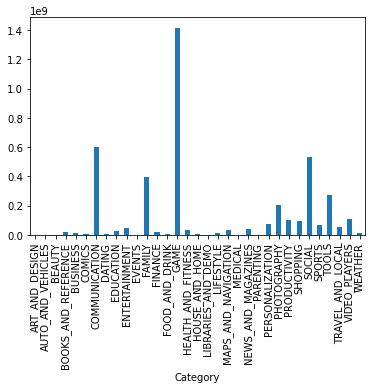

In [49]:
df.groupby("Category")["Reviews"].sum().plot(kind="bar")

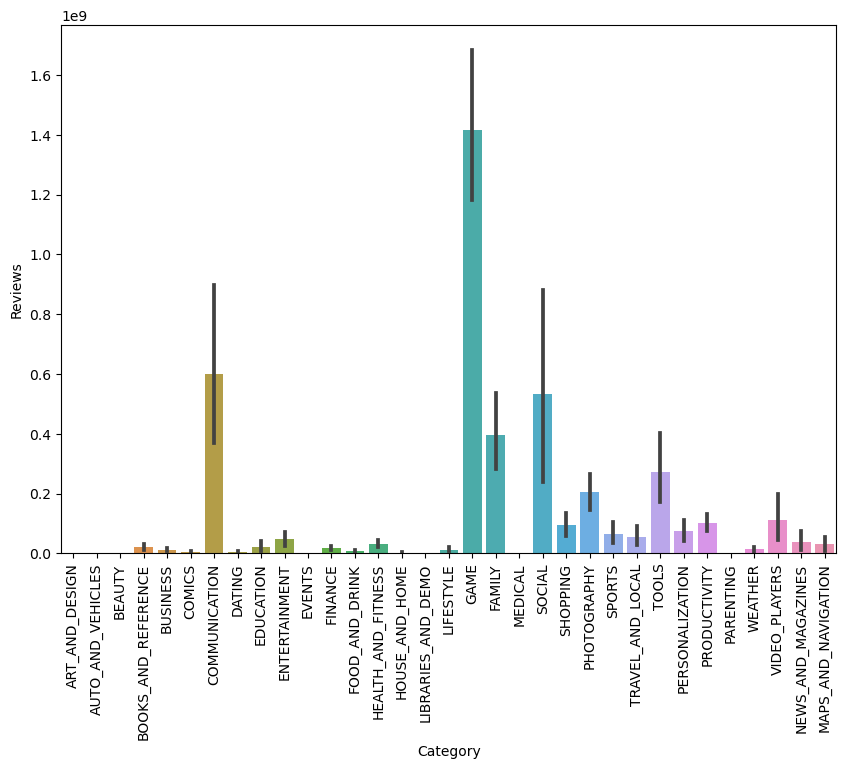

In [50]:
# or
plt.figure(figsize = (10,7), dpi =100)
sns.barplot(x="Category",y="Reviews",data=df,estimator=sum)
plt.xticks(rotation = 90);

### which  kind of app user downloading most free or paid

<AxesSubplot:xlabel='Type,Content Rating'>

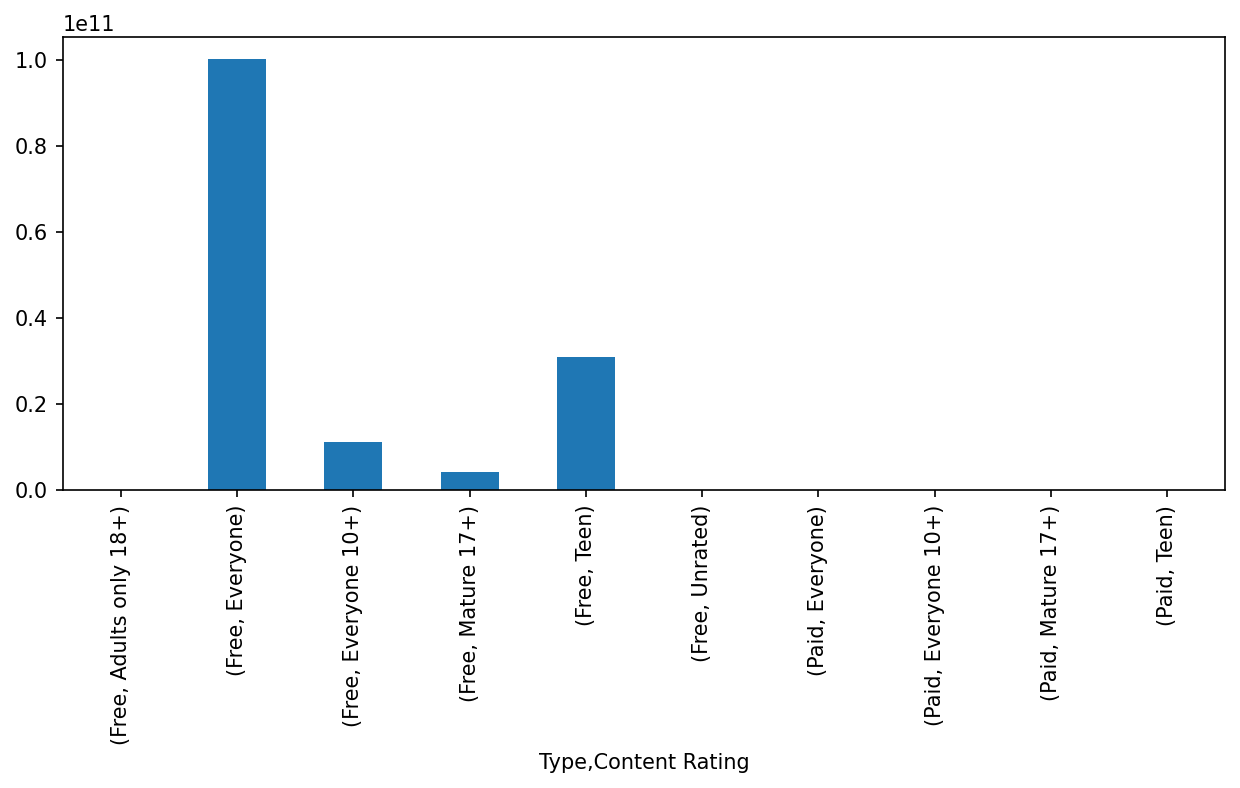

In [51]:
plt.figure(figsize = (10,4), dpi =150)
df.groupby(["Type","Content Rating"])["Installs"].sum().plot(kind="bar")

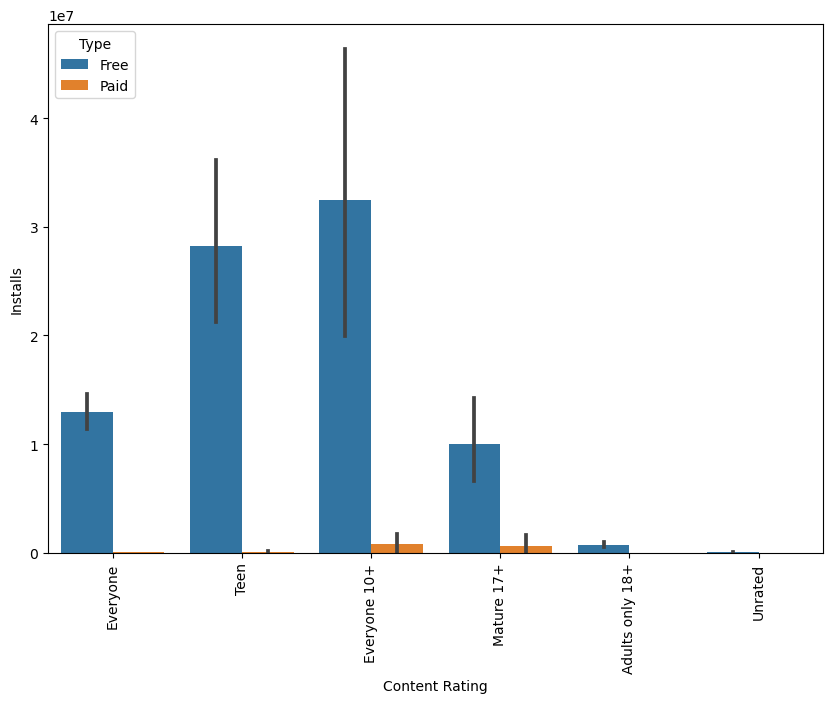

In [52]:
plt.figure(figsize = (10,7), dpi =100)
sns.barplot(x="Content Rating", y="Installs",hue="Type",data=df)
plt.xticks(rotation = 90);

In [53]:
df.to_csv("googleplaystore_clean_eda.csv")